# GRIP-TASK # 3 : To Explore Unsupervised Machine Learning
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#import the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn import datasets


In [4]:
import os
data_dir=os.getcwd()
data_dir

'C:\\Users\\RetailAdmin\\Downloads\\Documents\\New folder'

In [5]:
# Load the iris dataset
df=pd.read_csv("iris.csv")
#iris = datasets.load_iris()
#df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Exploratory Data Analysis

In [6]:
#As this is unsupervised learning so Label (Output Column) is unknown

df.head() #Printing first 5 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.drop(['Id'],axis=1,inplace=True) #Irrelevant column is droped

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.shape

(150, 5)

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

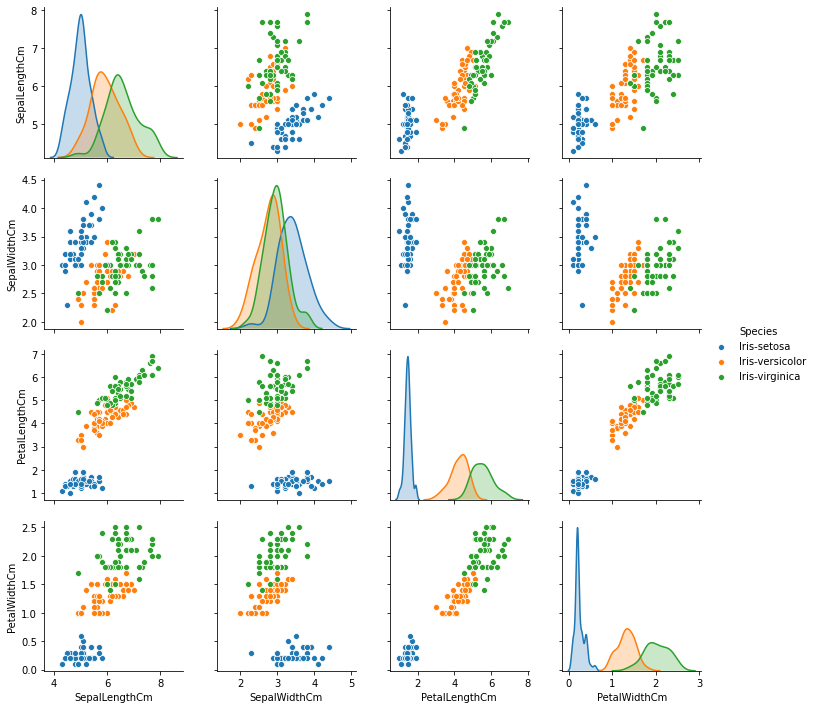

In [12]:
sns.pairplot(data=df,hue='Species')

In [23]:
# Feature selection for the model
x = df.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Elbow method

In [14]:
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
from sklearn.cluster import KMeans
wcss=[]

In [15]:
#we always assume the max number of cluster would be 10
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #inertia_ is the formula used to segregate the data points into clusters

In [16]:
clusDict = {'Clusters': range(1,11), 'elbow':wcss}

In [17]:
clusters = pd.DataFrame(clusDict)
clusters

,Clusters,elbow
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.561630
5,6,38.930963
6,7,34.190688
7,8,30.063874
8,9,27.842356
9,10,26.048202


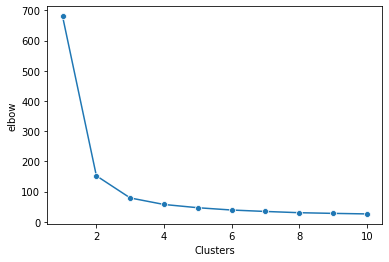

In [18]:
sns.lineplot(x = 'Clusters' , y= 'elbow', data = clusters,marker='o')

From the above graph we choose `optimum cluster as 3` because this is where `elbow` occurs.

In [19]:
#Model Build using kmeans
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x) #y_kmeans is the final model

# Visualization

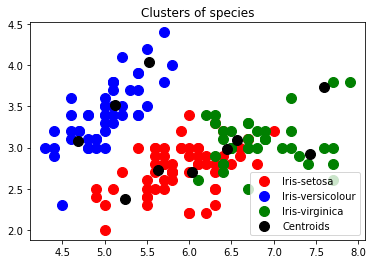

In [24]:
#Visualizing all the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of species')
plt.legend()
plt.show()